In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.9.1


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 3s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

<function matplotlib.pyplot.show(close=None, block=None)>

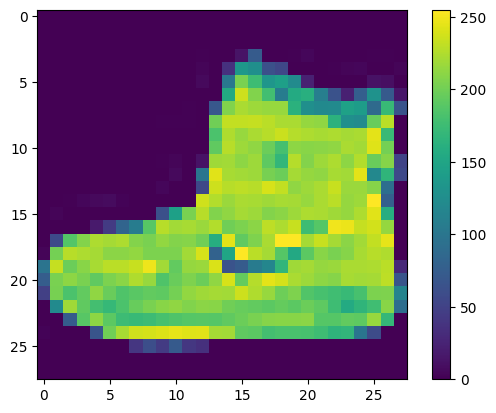

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

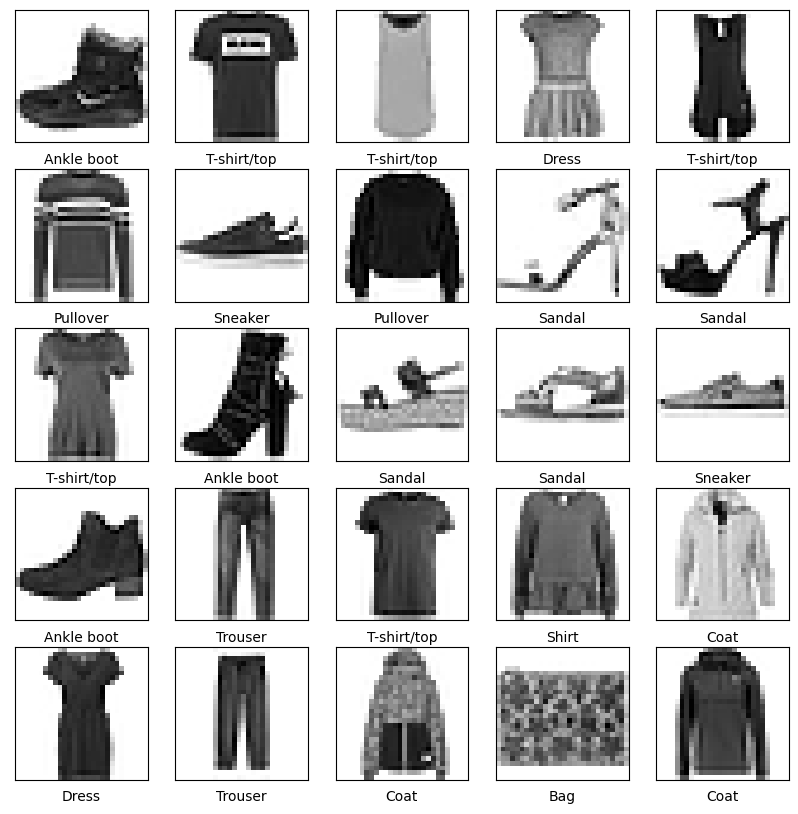

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4987 - accuracy: 0.8265
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3778 - accuracy: 0.8636
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3369 - accuracy: 0.8763
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3126 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2932 - accuracy: 0.8916


In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels,  verbose=2)

print('\nTEST ACCURACY : ', test_acc)

313/313 - 1s - loss: 0.3727 - accuracy: 0.8686 - 1s/epoch - 4ms/step

TEST ACCURACY :  0.8686000108718872


In [11]:
predictions = model.predict(test_images)

predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.5818081e-05, 5.6610264e-07, 6.2383073e-08, 4.0453750e-07,
       2.3200039e-07, 1.7142575e-04, 2.1621959e-06, 9.4991393e-02,
       8.9965848e-05, 9.0472800e-01], dtype=float32)

In [12]:
np.argmax(predictions[0])

9

In [13]:
np.argmax(predictions[0])

9

In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

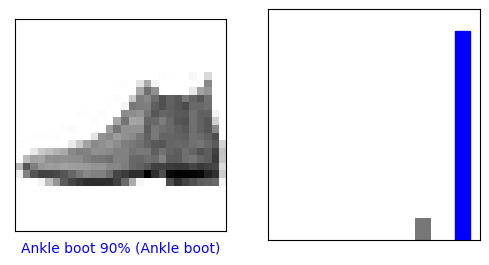

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

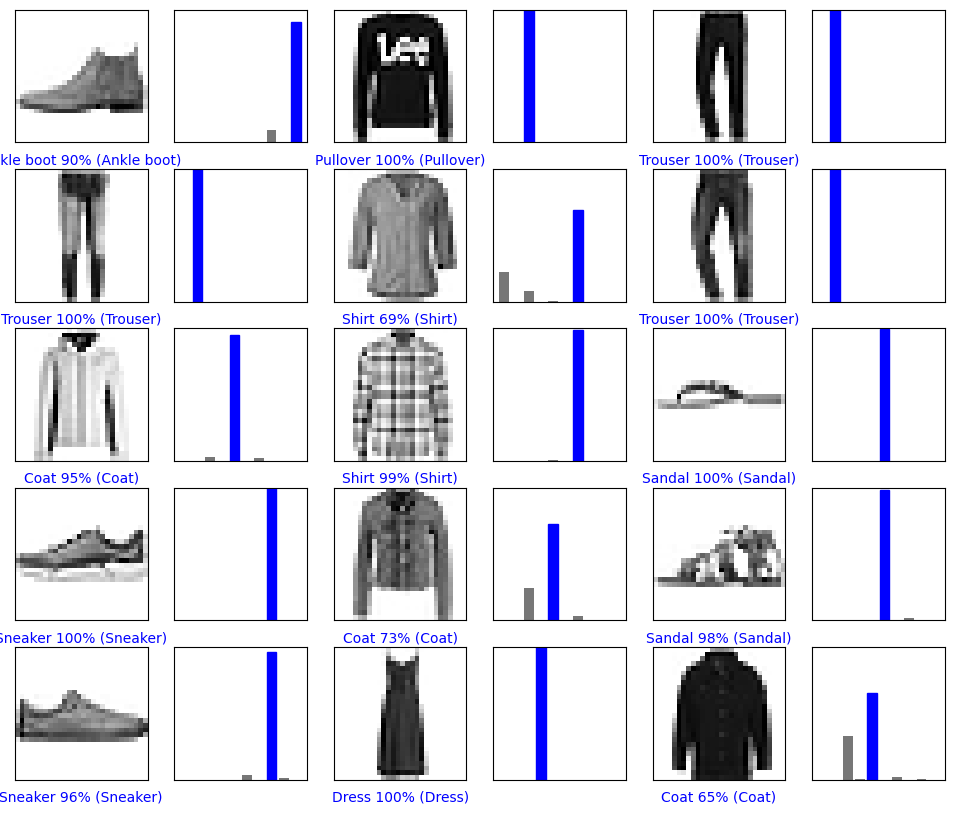

In [16]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [18]:
img = test_images[0]

img = (np.expand_dims(img, 0))

predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 20ms/step
[[1.5818081e-05 5.6610213e-07 6.2382952e-08 4.0453710e-07 2.3200016e-07
  1.7142575e-04 2.1621938e-06 9.4991371e-02 8.9965848e-05 9.0472800e-01]]


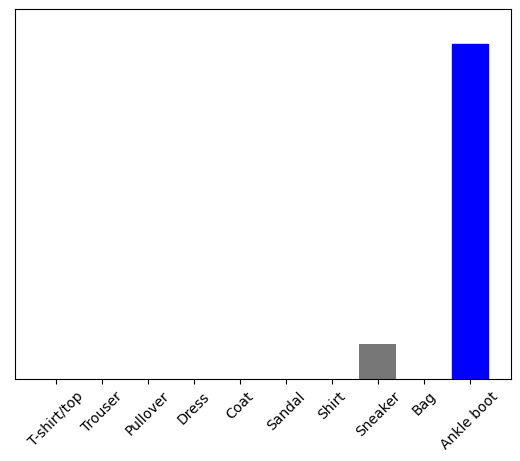

In [19]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [20]:
np.argmax(predictions_single[0])

9